In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from scipy.stats import pearsonr

#create DataFrame
df = pd.read_csv('data/2024-t1.csv', sep=',')# Convert the 'date' column with format 'yyyy-mm-dd' to datetime format
# For each number in the csv, divide by 1000 to get the number in thousands
for column in df.columns:
    if column != 'Date':
        df[column] = df[column]/1000

df['date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


In [3]:
summary_stats = df.describe()
print(summary_stats)


                                date     overall  sociability      health  \
count                            353  315.000000   257.000000  263.000000   
mean   2023-06-27 21:29:03.909348352    8.692381     8.836187    8.674144   
min              2023-01-01 00:00:00    6.500000     7.000000    6.200000   
25%              2023-03-30 00:00:00    8.400000     8.700000    8.400000   
50%              2023-06-27 00:00:00    8.700000     8.900000    8.800000   
75%              2023-09-24 00:00:00    9.000000     9.100000    9.000000   
max              2023-12-27 00:00:00    9.900000     9.800000    9.700000   
std                              NaN    0.572629     0.436040    0.615959   

           energy  happiness  positivity  productivity     purpose  \
count  258.000000  15.000000  277.000000    245.000000  255.000000   
mean     8.605039   8.633333    8.874007      8.177551    8.566667   
min      6.000000   7.000000    6.800000      6.300000    6.500000   
25%      8.300000   8.1000

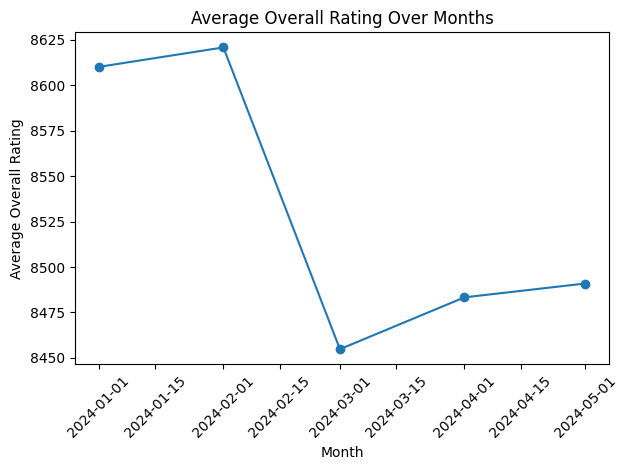

In [15]:
# Convert the 'date' column with format 'yy-mm-dd' to datetime format
df['date'] = pd.to_datetime(df['date'], format='%y-%m-%d')

# Create a new column 'Month' to extract the month from the date
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()

# Calculate the average overall rating for each month
monthly_avg = df.groupby('month')['Overall'].mean().reset_index()

# Plot the graph
plt.figure()
plt.plot(monthly_avg['month'], monthly_avg['Overall'], marker='o')
plt.title('Average Overall Rating Over Months')
plt.xlabel('Month')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# For each category, canculate the average rating for each day pf the week
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()

# Convert rating columns to numeric, coercing errors to NaN
all_rating_columns = ['Readiness', 'Mindfulness', 'Positivity', 'Health', 'Courage', 'Energy', 'Engagement', 
                  'Communication', 'Leadership', 'Focus', 'Productivity', 'Discipline', 'Purpose', 
                  'Stimulation', 'Uniqueness', 'Overall']
rating_columns = ['Mindfulness', 'Health', 'Courage', 'Energy', 'Engagement','Communication',
                  'Leadership', 'Focus', 'Discipline', 'Purpose', 'Uniqueness', 'Overall']
for col in rating_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group by day of the week and calculate mean for each category
average_ratings = df.groupby('DayOfWeek')[rating_columns].mean()

# Optional: Sort days of the week
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_ratings = average_ratings.reindex(days_of_week_order)


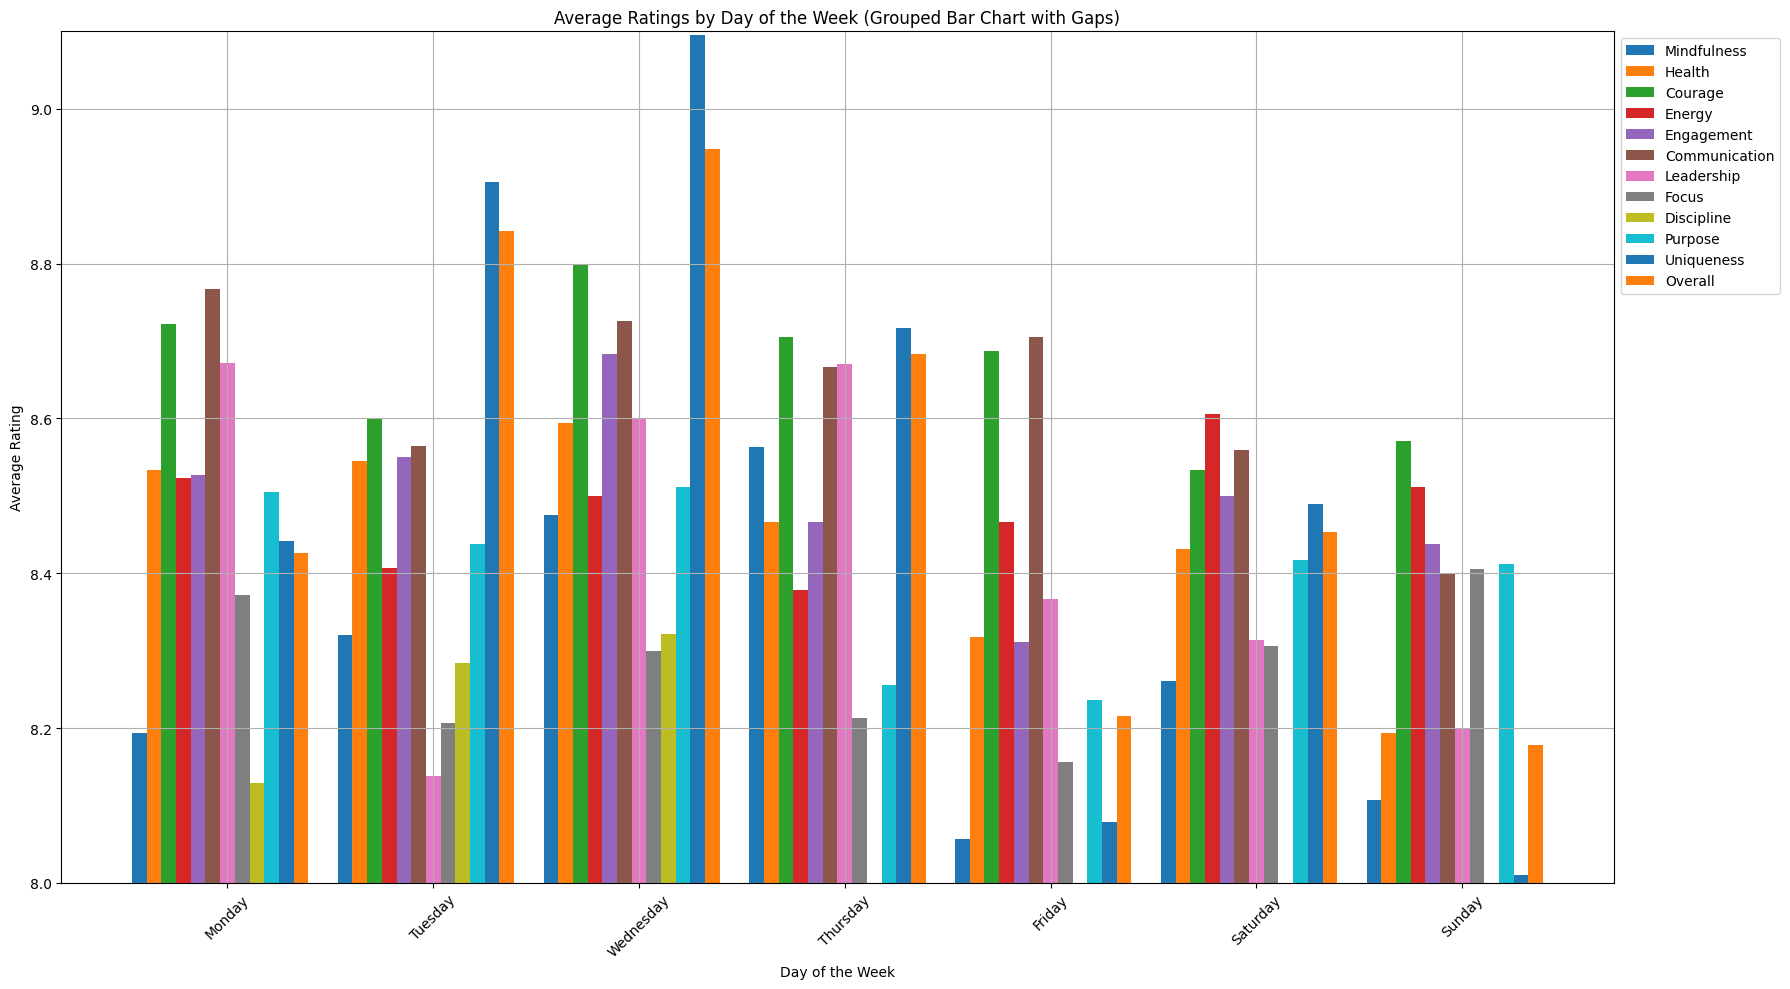

In [34]:

# Plot settings
categories = average_ratings.columns
days = average_ratings.index
num_categories = len(categories)
bar_width = 0.1
gap = 0.2  # Gap between groups of bars for each day
indices = np.arange(len(days)) * (num_categories * bar_width + gap)

plt.figure(figsize=(18, 10))

# Plot bars for each category
for i, category in enumerate(categories):
    plt.bar(indices + i * bar_width, average_ratings[category], bar_width, label=category)

# Adding titles and labels
plt.title('Average Ratings by Day of the Week (Grouped Bar Chart with Gaps)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')
plt.xticks(indices + bar_width * (num_categories / 2), days, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.ylim(8, 9.1)


# Display the plot
plt.tight_layout()
plt.show()

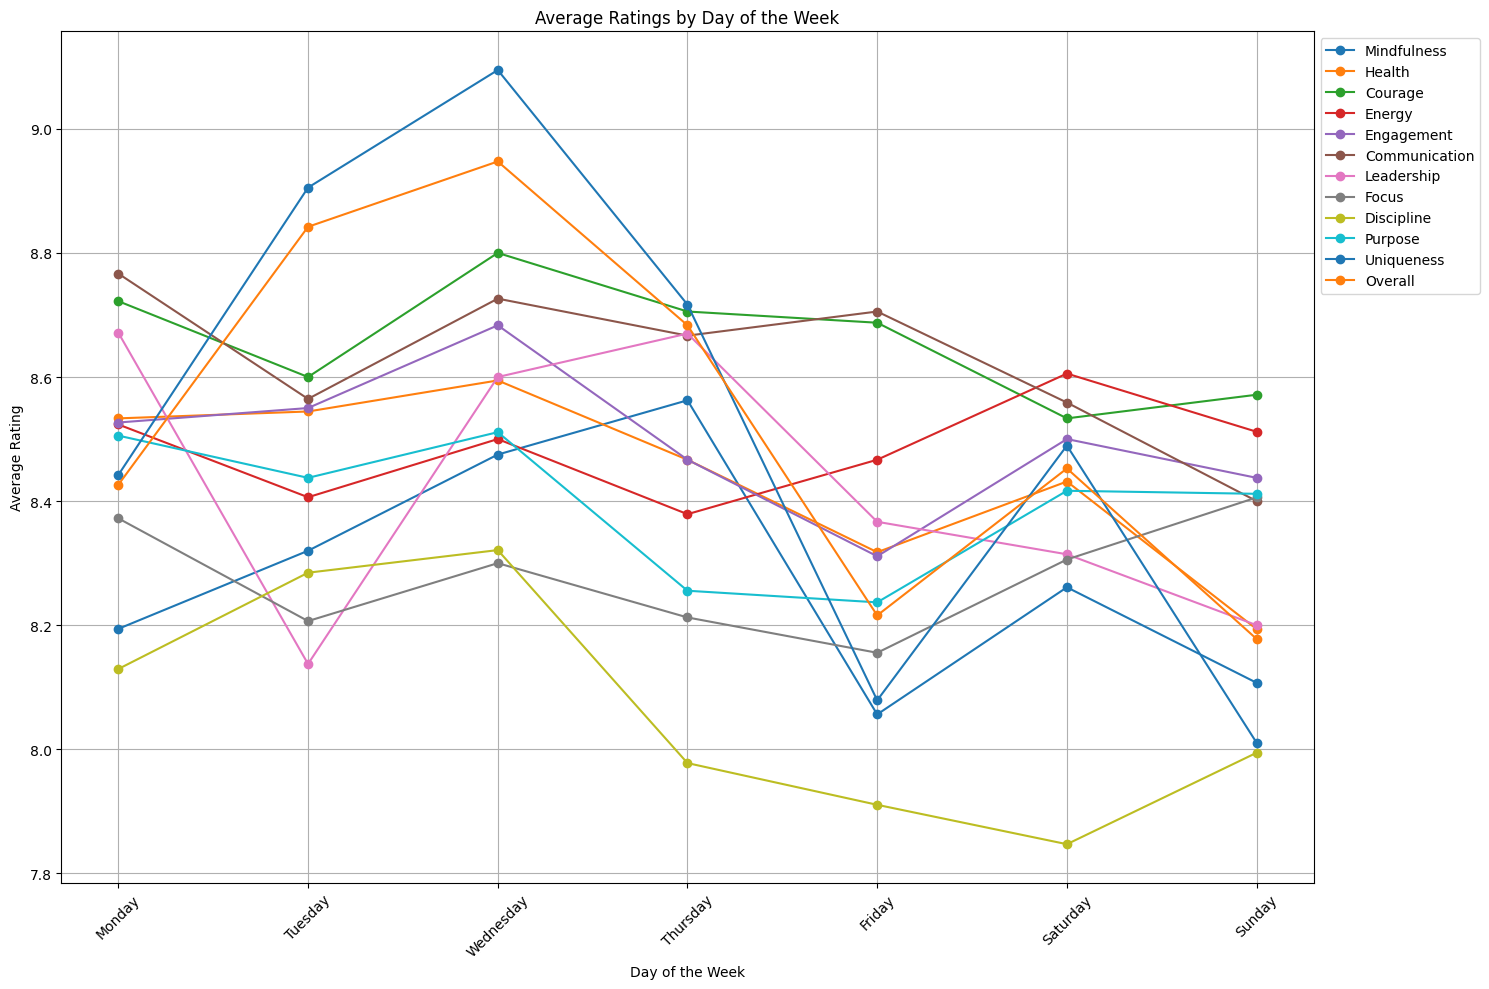

In [29]:
plt.figure(figsize=(15, 10))
    
for column in average_ratings.columns:
    plt.plot(average_ratings.index, average_ratings[column], marker='o', label=column)

# Adding titles and labels
plt.title('Average Ratings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

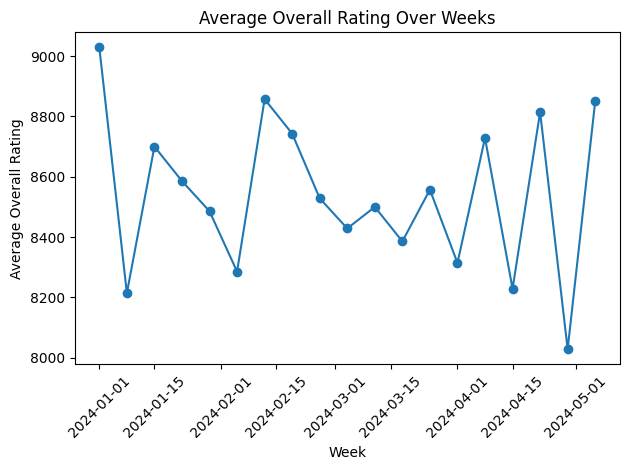

In [16]:
# Create a new column 'Week' to extract the week from the date
df['week'] = df['date'].dt.to_period('W').dt.to_timestamp()

# Calculate the average overall rating for each week
weekly_avg = df.groupby('week')['Overall'].mean().reset_index()

# Plot the graph
plt.figure()
plt.plot(weekly_avg['week'], weekly_avg['Overall'], marker='o')
plt.title('Average Overall Rating Over Weeks')
plt.xlabel('Week')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

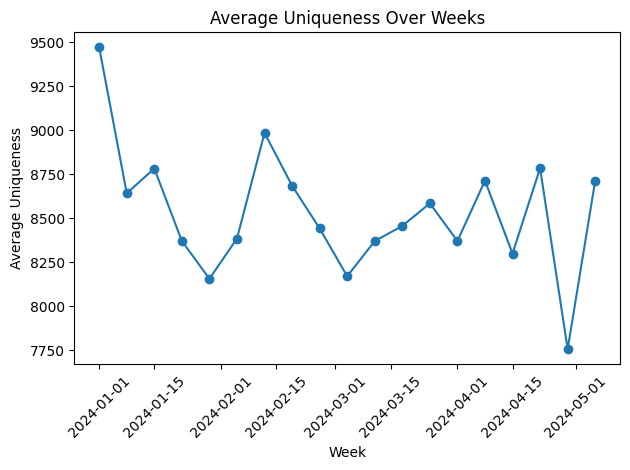

In [27]:
unique_weekly_avg = df.groupby('week')['Uniqueness'].mean().reset_index()
# Mindfulness,Positivity,Health,Courage,Energy,Engagement,Communication,Leadership,Focus,Productivity,Discipline,Purpose,Stimulation
# do it for all the columns above
# Calculate the average overall rating for each week
unique_weekly_avg = df.groupby('week')['Uniqueness'].mean().reset_index()
mindfulness_weekly_avg = df.groupby('week')['Mindfulness'].mean().reset_index()
positivity_weekly_avg = df.groupby('week')['Positivity'].mean().reset_index()
health_weekly_avg = df.groupby('week')['Health'].mean().reset_index()
courage_weekly_avg = df.groupby('week')['Courage'].mean().reset_index()
energy_weekly_avg = df.groupby('week')['Energy'].mean().reset_index()
engagement_weekly_avg = df.groupby('week')['Engagement'].mean().reset_index()
communication_weekly_avg = df.groupby('week')['Communication'].mean().reset_index()
leadership_weekly_avg = df.groupby('week')['Leadership'].mean().reset_index()
focus_weekly_avg = df.groupby('week')['Focus'].mean().reset_index()
productivity_weekly_avg = df.groupby('week')['Productivity'].mean().reset_index()
discipline_weekly_avg = df.groupby('week')['Discipline'].mean().reset_index()
purpose_weekly_avg = df.groupby('week')['Purpose'].mean().reset_index()
stimulation_weekly_avg = df.groupby('week')['Stimulation'].mean().reset_index()



plt.figure()
plt.plot(unique_weekly_avg['week'], unique_weekly_avg['Uniqueness'], marker='o')
plt.title('Average Uniqueness Over Weeks')
plt.xlabel('Week')
plt.ylabel('Average Uniqueness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

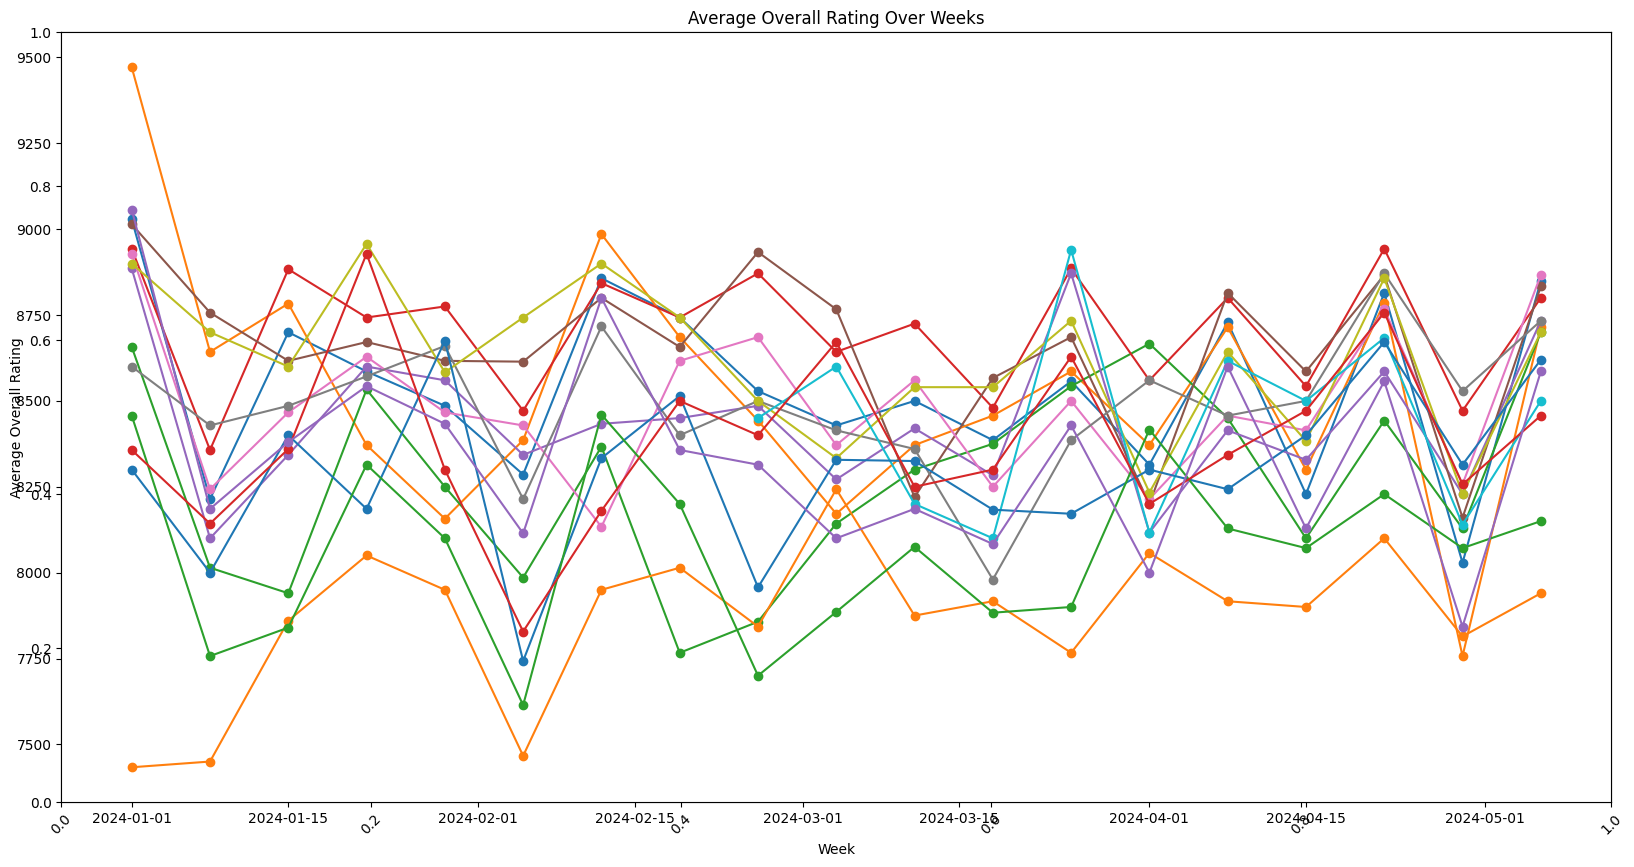

In [42]:
plt.figure(figsize=(20, 10))
plt.title('Average Overall Rating Over Weeks')
plt.xlabel('Week')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
ax = plt.axes()
ax.plot(weekly_avg['week'], weekly_avg['Overall'], marker='o')
ax.plot(unique_weekly_avg['week'], unique_weekly_avg['Uniqueness'], marker='o')
ax.plot(mindfulness_weekly_avg['week'], mindfulness_weekly_avg['Mindfulness'], marker='o')
ax.plot(positivity_weekly_avg['week'], positivity_weekly_avg['Positivity'], marker='o')
ax.plot(health_weekly_avg['week'], health_weekly_avg['Health'], marker='o')
ax.plot(courage_weekly_avg['week'], courage_weekly_avg['Courage'], marker='o')
ax.plot(energy_weekly_avg['week'], energy_weekly_avg['Energy'], marker='o')
ax.plot(engagement_weekly_avg['week'], engagement_weekly_avg['Engagement'], marker='o')
ax.plot(communication_weekly_avg['week'], communication_weekly_avg['Communication'], marker='o')
ax.plot(leadership_weekly_avg['week'], leadership_weekly_avg['Leadership'], marker='o')
ax.plot(focus_weekly_avg['week'], focus_weekly_avg['Focus'], marker='o')
ax.plot(productivity_weekly_avg['week'], productivity_weekly_avg['Productivity'], marker='o')
ax.plot(discipline_weekly_avg['week'], discipline_weekly_avg['Discipline'], marker='o')
ax.plot(purpose_weekly_avg['week'], purpose_weekly_avg['Purpose'], marker='o')
ax.plot(stimulation_weekly_avg['week'], stimulation_weekly_avg['Stimulation'], marker='o')
# ax.legend(['Overall', 'Uniqueness', 'Mindfulness', 'Positivity', 'Health', 'Courage', 'Energy', 'Engagement', 'Communication', 'Leadership', 'Focus', 'Productivity', 'Discipline', 'Purpose', 'Stimulation'])
plt.show()


# show a huge plot


/var/folders/m1/wpds60495c9_z88fhcc4gw_c0000gn/T/ipykernel_49804/3182471796.py:45: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(x_daily, y_daily, marker='o')


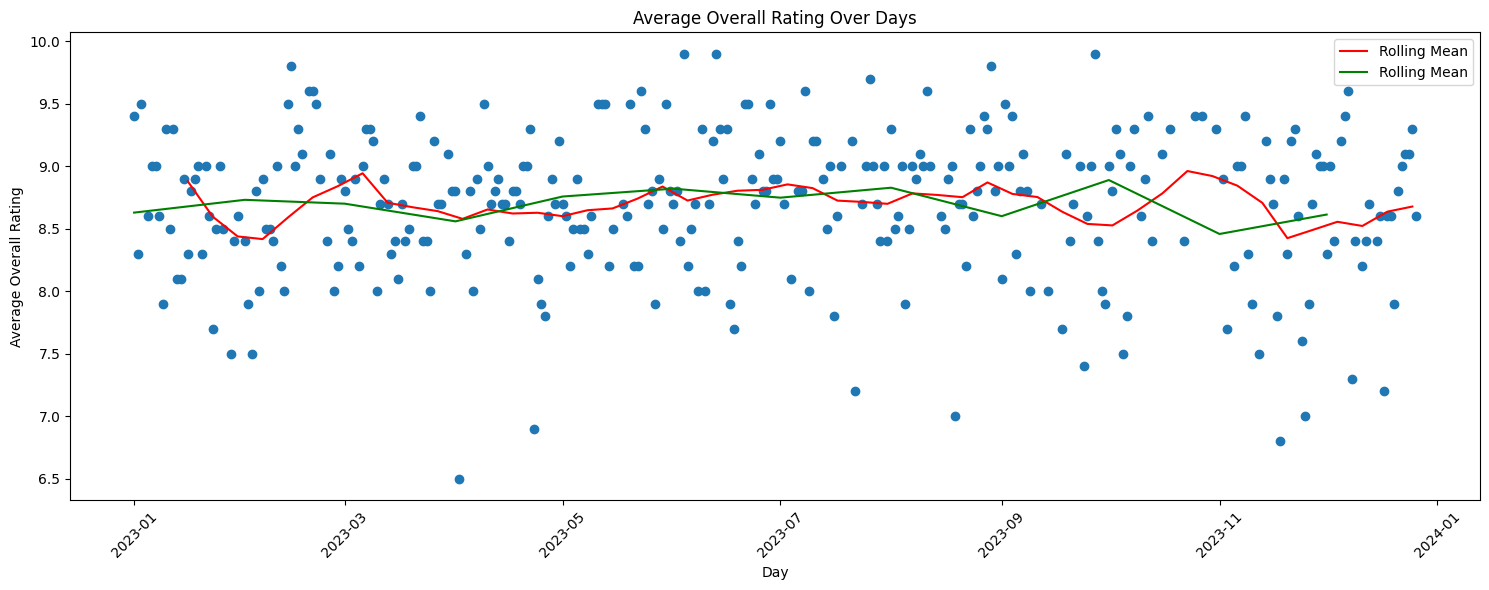

In [30]:
import numpy as np
from scipy import stats
from matplotlib import dates as mdates

# Create a new column 'Day' to extract the day from the date
df['day'] = df['date'].dt.to_period('D').dt.to_timestamp()

# Calculate the average overall rating for each day
daily_avg = df.groupby('day')['overall'].mean().reset_index()
daily_avg = daily_avg.dropna()

# Convert the 'day' column to numeric for trend line calculation
x_daily = mdates.date2num(daily_avg['day'])
y_daily = daily_avg['overall']
# Create a new column 'Week' to extract the week from the date
df['week'] = df['date'].dt.to_period('W').dt.to_timestamp()
# Calculate the average overall rating for each week
weekly_avg = df.groupby('week')['overall'].mean().reset_index()
weekly_avg = weekly_avg.dropna()
# Calculate the rolling mean with a window size of 4 (approximately a month)
weekly_avg['rolling_mean'] = weekly_avg['overall'].rolling(window=4).mean()

# Create a new column 'Month' to extract the month from the date
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
# Calculate the average overall rating for each month
monthly_avg = df.groupby('month')['overall'].mean().reset_index()
monthly_avg = monthly_avg.dropna()
# Calculate the rolling mean with a window size of 4 (approximately a month)
monthly_avg['rolling_mean'] = monthly_avg['overall'].rolling(window=1).mean()

# Convert the 'week' column to numeric for trend line calculation
x = mdates.date2num(weekly_avg['week'])
y = weekly_avg['rolling_mean']

# Convert the 'month' column to numeric for trend line calculation
x_month = mdates.date2num(monthly_avg['month'])
y_month = monthly_avg['rolling_mean']

# Calculate the trend line (2nd degree polynomial)
z = np.polyfit(x_daily, y_daily, 2)
p = np.poly1d(z)

# Plot the graph
plt.figure(figsize=(15, 6))
plt.plot_date(x_daily, y_daily, marker='o')
plt.plot_date(x, y, 'r-', label='Rolling Mean (4 weeks)')
plt.plot_date(x_month, y_month, 'g-', label='Rolling Mean (1 month)')
# plt.plot_date(x, p(x), 'r-', label='y = {:.6f}x^2 + {:.6f}x + {:.6f}'.format(z[0],z[1],z[2]))
plt.title('Average Overall Rating Over Days')
plt.xlabel('Day')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [50]:

highest = {}
index = 15
cols = df.columns
cols = cols.drop('Date')#.drop('peak').drop('unique').drop('sleep').drop('wake').drop('date').drop('bottles drank').drop('times peed').drop('time slept').drop('time awaked').drop('total sleep time').drop('effectiveness (Am I SPENDING the RIGHT TIME)').drop('Sleep Min').drop('Sleep Hr').drop('Awake Hr').drop('% of planned output').drop("Time slept").drop("Time woken")
# calculate correlation coefficient between all cols with overall score
for j in range(0, len(cols)):
    if j == index or j == len(cols) + index:
        continue
    col1 = cols[index]
    col2 = cols[j]
    # try:
    # corr, p = pearsonr(df[col1].dropna(), df[col2].dropna())
    # except:
    corr = df[col1].corr(df[col2])
    # p=None
    highest[col2] = f'{corr}'#, {p}'

highest = sorted(highest.items(), key=lambda x: x[1], reverse=True)
print(f'Correlation coefficient between {cols[index]} and other columns: \n')
for k, v in highest:
    print(k, v, sep=':\t')

Correlation coefficient between Overall and other columns: 

Stimulation:	0.8881129369392335
Uniqueness:	0.7995550855400593
Positivity:	0.7139816800502188
Health:	0.6694793628940411
Mindfulness:	0.6086943033585639
Engagement:	0.5087574593451305
Courage:	0.46359374162706274
Energy:	0.4423509798483288
Discipline:	0.4235807663560136
Communication:	0.37581163299689807
Leadership:	0.341797157796507
Purpose:	0.33272305685522596
Focus:	0.3205237565726369
Productivity:	0.22229441717788107
Readiness:	0.07897517402309577
date:	-0.1075898509615262
month:	-0.1050834980115574
week:	-0.09191917216052362


In [45]:
import pandas as pd

#create DataFrame
# df = pd.read_csv('data/2022.csv')
highest = {}

cols = df.columns
cols = cols.drop('Date')#.drop('bottles drank').drop('times peed').drop('time slept').drop('time awaked').drop('total sleep time').drop('effectiveness (Am I SPENDING the RIGHT TIME)').drop('Sleep Min').drop('Sleep Hr').drop('Awake Hr').drop('% of planned output').drop("Time slept").drop("Time woken")


# calculate correlation coefficient between all cols
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        # try:
        # corr, p = pearsonr(df[col1].dropna(), df[col2].dropna())
        # except:
        corr = df[col1].corr(df[col2])
        # p=None
        highest[col1 + '-' + col2] = f'{corr}'#, {p}'

highest = sorted(highest.items(), key=lambda x: x[1], reverse=True)
for k, v in highest:
    if not (k == 'Steps-Distance' or k == 'Minutes Asleep-Time in Bed'):
        print(k, v, sep=':\t')

date-week:	0.9986422261219269
date-month:	0.974137376997904
month-week:	0.9728914068390112
Stimulation-Overall:	0.8881129369392335
Stimulation-Uniqueness:	0.8454877641103923
Positivity-Health:	0.7997691265336119
Uniqueness-Overall:	0.7995550855400594
Courage-Leadership:	0.7345127781271419
Engagement-Focus:	0.7145877816402423
Positivity-Overall:	0.7139816800502188
Health-Overall:	0.6694793628940411
Mindfulness-Positivity:	0.6594717968400267
Positivity-Engagement:	0.6592869457761478
Mindfulness-Health:	0.6489453083641782
Productivity-Purpose:	0.6293138859776488
Mindfulness-Engagement:	0.627466075390343
Readiness-Positivity:	0.6258409275407508
Positivity-Leadership:	0.6232224477956059
Mindfulness-Overall:	0.6086943033585639
Health-Leadership:	0.5881860086466864
Health-Energy:	0.5787824220885089
Focus-Productivity:	0.5716365366097702
Positivity-Stimulation:	0.5672692087277164
Courage-Communication:	0.55269697850913
Health-Stimulation:	0.5525666938133368
Positivity-Energy:	0.549198871480327

In [ ]:
import pandas as pd
import glob
import os

path = r'/Users/rami/Library/CloudStorage/OneDrive-UniversityofCalgary/code/python/hello_ds/journal-data-analysis/2022-activity' # use your path

all_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# save to csv
df.to_csv('2022-a.csv', index=False, encoding='utf-8')

path = r'/Users/rami/Library/CloudStorage/OneDrive-UniversityofCalgary/code/python/hello_ds/journal-data-analysis/2022-sleep' # use your path

all_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# save to csv
df.to_csv('2022-s.csv', index=False, encoding='utf-8')

In [ ]:
# DANGEROUS, remove first line of all files in 'all_files'
for f in all_files:
    with open(f, 'r') as fin:
        data = fin.read().splitlines(True)
    with open(f, 'w') as fout:
        fout.writelines(data[1:])

In [ ]:
import pandas as pd

# Read in the two CSV files
df1 = pd.read_csv("2022-s.csv")
df2 = pd.read_csv("2022-a.csv")

# Merge the two dataframes on a common column
merged_df = df2.join(df1.set_index('Date'), on='Date')

# Save the merged dataframe to a new CSV file
merged_df.to_csv("2022-fb.csv", index=False)

In [9]:
with open('2022-m.csv', 'r') as fin:
    data = fin.read().splitlines(True)
    # get the number of times each date was mentioned
    dates = {}
    for date in data:
        date = date.strip()
        if date in dates:
            dates[date] += 1
        else:
            dates[date] = 1

In [5]:

import pandas as pd

# Read in the two CSV files
df1 = pd.read_csv("2022-fb.csv")
df2 = pd.read_csv("2022-jd.csv")

# Merge the two dataframes on a common column
merged_df = df2.join(df1.set_index('Date'), on='Date')

# add the number of times each date was mentioned to its row
merged_df['scrobbles'] = merged_df['Date'].map(dates)

# Save the merged dataframe to a new CSV file
merged_df.to_csv("2022.csv", index=False)

In [ ]:
import pandas as pd

# Read in the two CSV files
df1 = pd.read_csv("2022.csv")
df2 = pd.read_csv("sleepStress.csv")

# Merge the two dataframes on a common column
merged_df = df1.join(df2.set_index('Date'), on='Date')


# Save the merged dataframe to a new CSV file
merged_df.to_csv("2022.csv", index=False)

In [ ]:
# TODO: use fasteda on my data
